# **Método do gradiente da descida mais íngreme**





In [1]:
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
def func(x,y):
  return (1-x)**2+100*(y-x**2)**2

def grad(x,y):
  return np.array([-2+2*x-400*x*(y-x**2)**2, 200*y*(y-x**2)])  

In [3]:
x = np.outer(np.linspace(-5.0, 5.0,100), np.ones(100))
y = np.outer(np.ones(100), np.linspace(-5.0,5.0,100))
z = func(x,y)

Text(0.5, 0, 'eixo z')

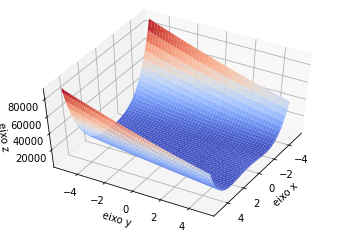

In [4]:
ax = plt.axes(projection = '3d')
ax.view_init(50,30)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')
ax.set_zlabel('eixo z')

Text(0, 0.5, 'eixo y')

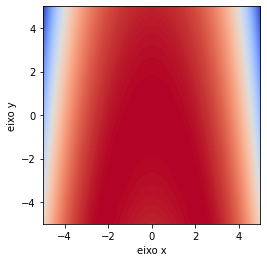

In [5]:
ax = plt.axes()
ax.imshow(-z.T, cmap=cm.coolwarm, extent=(-5,5,-5,5), interpolation='bilinear')
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')

In [6]:
qx=[]
qy=[]
qu=[]
qv=[]

for xi in np.linspace(-1,1,10):
  for yi in np.linspace(-1,1,10):
    ui, vi = grad(xi,yi)

    qx.append(xi)
    qy.append(yi)
    qu.append(ui)
    qv.append(vi)

Text(0, 0.5, 'eixo y')

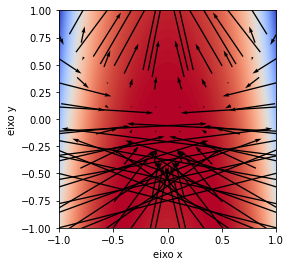

In [7]:
ax = plt.axes()
ax.imshow(-z.T, cmap=cm.coolwarm, extent=(-1,1,-1,1), interpolation='bilinear')
Q = ax.quiver(qx,qy,qu,qv, scale=360.0, pivot='mid')
qk = ax.quiverkey(Q, 0.1, 0.1, 0.1, '', labelpos='E', coordinates='figure')
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')

In [8]:
def func3d(x):
  x1,x2 = x
  return (1-x1)**2+100*(x2-x1**2)**2

In [9]:
def grad3d(x):
  x1,x2 = x
  h=0.01
  h1=np.array([h,0.0])
  h2=np.array([0.0,h])
  z = func3d(x)
  df_dx = (func3d(x+h1)-z)/h 
  df_dy = (func3d(x+h2)-z)/h 
  return np.array([df_dx, df_dy])

In [10]:
x = np.array(\
             [np.outer(np.linspace(-5.0,5.0,100),np.ones(100)),\
              np.outer(np.ones(100), np.linspace(-3.0,7.0,100))])
z=func3d(x)

(-5.5, 5.5, -3.5, 7.5)

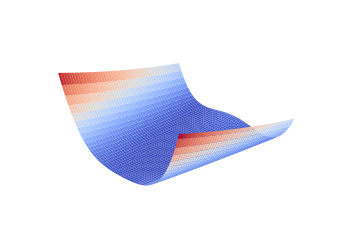

In [11]:
ax=plt.axes(projection='3d')
ax.view_init(50,-45)
ax.plot_surface(x[0,:],x[1,:],z,cmap=cm.coolwarm)
plt.axis('off')

[2. 2.]
[1.35116396 2.1596    ]


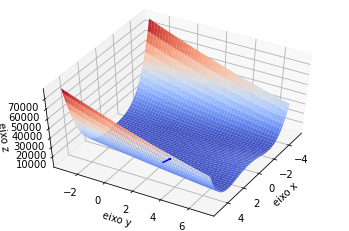

In [12]:
xi = np.array([2.0,2.0])
xs = []
zs = []
for i in range(4):
  zi = func3d(xi)
  xs.append(xi)
  zs.append(zi)
  xi=xi-0.0004*grad3d(xi)
xs=np.array(xs)
zs=np.array(zs)
ax=plt.axes(projection='3d')
ax.view_init(50,30)
ax.plot_surface(x[0,:],x[1,:],z,cmap=cm.coolwarm)
ax.plot(xs[:,0],xs[:,1],zs,'-',c='b',zorder=100)
ax.set_xlabel('eixo x')
ax.set_ylabel('eixo y')
ax.set_zlabel('eixo z')
print(xs[0])
print(xs[1])

# **Método do gradiente da descida mais íngreme - TensorFlow**

In [13]:
import tensorflow as tf
from IPython.display import Image

import numpy as np
import seaborn; seaborn.set()
from matplotlib import pyplot as plt

In [14]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0004)
var = tf.Variable(2.0)
loss = lambda: (1-var)**2+100*(var-var**2)**2         
step_count = opt.minimize(loss, [var]).numpy()
# Step is `- learning_rate * grad`
var.numpy()

1.5192

# **Método de Newton - scipy**

In [16]:
from scipy import optimize
import matplotlib.pyplot as plt

In [17]:
def f(x):
    return (1-x)**2+100*(x-x**2)**2

In [18]:
minimo = optimize.newton(f, 2.0)
print(minimo)

1.0000000195632512
